In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from tensorflow.keras.layers import Dense,Flatten,Input,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Dropout
from tensorflow.keras.models import Model

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [3]:
labels='''
        T-shirt/top
        trouser
        pullover
        dress
        coat
        sandal
        shirt
        sneakers
        bag
        ankleboots'''.split()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

	 ankleboots


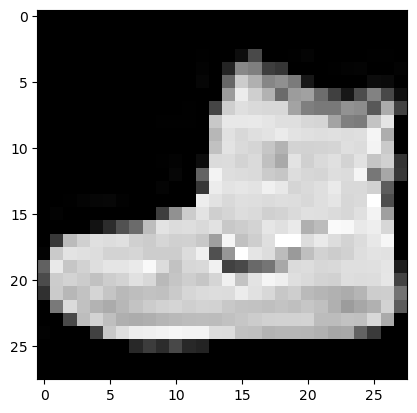

In [7]:
plt.imshow(X_train[0],cmap='gray')
print('\t',labels[y_train[0]])

ankleboots


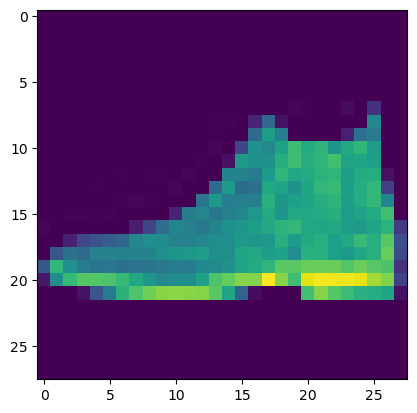

In [8]:
plt.imshow(X_test[0])
print(labels[y_test[0]])

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
K=len(set(y_train))

In [11]:
X_train,X_test=X_train/255,X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [14]:
X_train[0].shape  # right shape for an CNN

(28, 28, 1)

In [15]:
i=Input(shape=X_train[0].shape)
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=GlobalMaxPooling2D()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5369 - accuracy: 0.8014 - val_loss: 0.3608 - val_accuracy: 0.8643
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3329 - accuracy: 0.8772 - val_loss: 0.3044 - val_accuracy: 0.8871
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2835 - accuracy: 0.8948 - val_loss: 0.3090 - val_accuracy: 0.8795
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2579 - accuracy: 0.9051 - val_loss: 0.2796 - val_accuracy: 0.8985
Epoch 5/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2389 - accuracy: 0.9122 - val_loss: 0.2584 - val_accuracy: 0.9056
Epoch 6/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2249 - accuracy: 0.9172 - val_loss: 0.2365 - val_accuracy: 0.9163
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2117 - accuracy: 0.9217 - val_loss: 0.2440 -

<Axes: >

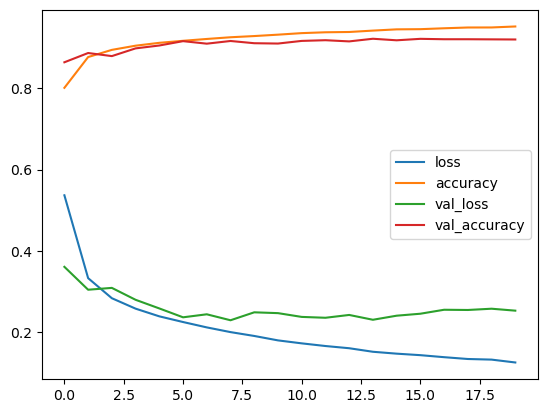

In [17]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [18]:
predictions=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predictions)

<Axes: >

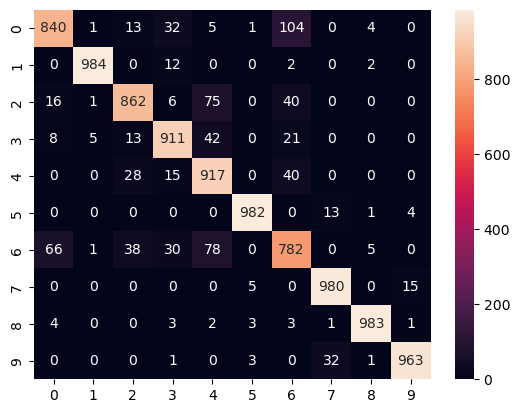

In [20]:
sns.heatmap(cm,annot=True,fmt='d')

true label: shirt Predicted: T-shirt/top


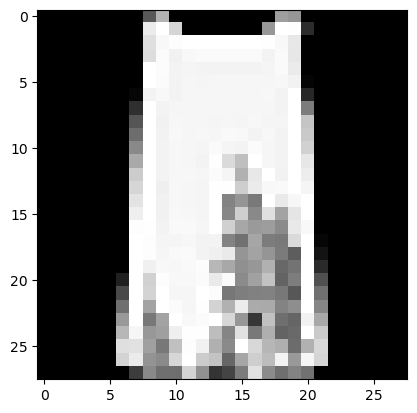

In [21]:
misclassified_idx=np.where(predictions!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
print('true label: %s Predicted: %s' % (labels[y_test[i]],labels[predictions[i]]))

In [22]:
labels

['T-shirt/top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneakers',
 'bag',
 'ankleboots']

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2529 - accuracy: 0.9204


[0.2529106140136719, 0.9204000234603882]